In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def dict_maker(num):
    f = open("/Users/cmdb/qbb2020-answers/week10/week13_data/KRAKEN/SRR4921"+num+".kraken")
    kraken = f.readlines()
    f.close()
    
    day_temp = {}
    for line in kraken:
        key = line.split('\t')[1]
        day_temp.setdefault(key,0)
        day_temp[key] += 1
        
    f = open("/Users/cmdb/qbb2020-answers/week10/week13_data/KRAKEN/day"+num+".kraken",'w')
    for key,val in day_temp.items():
        x = key.split(';')
        f.write(str(val) + '\t')
        for y in x[:-1]:
            f.write(y+'\t')
        f.write(x[-1])
    f.close()  

In [15]:
kraken_list = ['83','86','88','89','90','93','94','97']
for krak in kraken_list:
    dict_maker(krak)

### Question 1:
The composition of bacteria changes drastically from day 1 to day 2. There are a lot more Staph species in day 1 which drops in the following days to be mostly replaced by Enterococcus species.

## Metabat commands:
jgi_summarize_bam_contig_depths --outputDepth depth.txt *.sorted.bam

metabat2 -i week13_data/assembly.fasta -a depth.txt -o week13_data/mybins

### Question 2:
K-mers would be the best metric to make contigs

### Question 3:
a. 6 bins<br/>

b. 640654  640654 38856945 assembly.fasta<br/>
   45165   45165 2752195 mybins.1.fa<br/>
   37646   37646 2292366 mybins.2.fa<br/>
   27612   27612 1683938 mybins.3.fa<br/>
   20521   20521 1249747 mybins.4.fa<br/>
   41415   41415 2525551 mybins.5.fa<br/>
   47722   47722 2910800 mybins.6.fa<br/>
  220081  220081 13414597 total<br/>
Looks like the total is around 33%

c. This makes sense as the prokaryotic genome is around 0.6 - 10 Mbp and the files fall within this range.

d. Compare the bin to the reference genome and look at how closely they match. Coverage represents completeness.

In [42]:
f = open("/Users/cmdb/qbb2020-answers/week10/week13_data/KRAKEN/assembly.kraken")
assembly = f.readlines()
f.close()

In [59]:
def bin_species_id(bin_num, assembly):
    f = open("/Users/cmdb/qbb2020-answers/week10/bins/bin."+bin_num+".fa")
    binfile = f.readlines()
    f.close()
    
    bin_dict = {}
    for line in binfile:
        if '>' in line:
            node = str(line.strip()[1:])
            for line in assembly:
                if node in line:
                    key = line.split('\t')[1]
                    bin_dict.setdefault(key,0)
                    bin_dict[key] += 1
    f = open("/Users/cmdb/qbb2020-answers/week10/bins/bin_species"+bin_num+".txt",'w')
    for key,val in bin_dict.items():
        f.write(key + '\n')
        f.write(str(val)+'\n')
        f.write('\n')
        
    max_key = max(bin_dict, key=lambda k: bin_dict[k])
    f.write('\nMost likely associated species:\t'+max_key)
    
    f.close()

In [60]:
bin_nums = ['1','2','3','4','5','6','7','8']
for num in bin_nums:
    bin_species_id(num,assembly)

### Question 4:
a. bin 1: Staphylococcus haemolyticus<br/>
    bin 2: Leuconostoc citreum<br/>
    bin 3: Staphylococcus lugdunensis<br/>
    bin 4: Enterococcus faecalis<br/>
    bin 5: Cutibacterium avidum<br/>
    bin 6: Staphylococcus epidermidis<br/>
    bin 7: Staphylococcus aureus<br/>
    bin 8: Anaerococcus prevotii (iffy)<br/>

b. Use ribosomal genes as markers for taxonomy purposes (16S). They are great for distinguishing between bacterial species.

In [81]:
bin_df = pd.read_csv('abundance_table.tab', sep = '\t',index_col = 'Genomic bins')
#index = {'bin.1':Staphylococcus haemolyticus', 'bin.4':'Enterococcus faecalis', 'bin.2':'Leuconostoc citreum', 'bin.5':'Cutibacterium avidum','bin.6':'Staphylococcus epidermidis', 'bin.7':'Staphylococcus aureus','bin.8':'Anaerococcus prevotii', 'bin.3':'Staphylococcus lugdunensis'}
bin_df.rename(index = {'bin.1':'Staphylococcus haemolyticus', 'bin.4':'Enterococcus faecalis', 'bin.2':'Leuconostoc citreum', 'bin.5':'Cutibacterium avidum','bin.6':'Staphylococcus epidermidis', 'bin.7':'Staphylococcus aureus','bin.8':'Anaerococcus prevotii', 'bin.3':'Staphylococcus lugdunensis'}, inplace = True)
#bin_df.rename(columns = {'SRR492183':'day1', 'SRR492186':'day2', 'SRR492188':'day3','SRR492189':'day4','SRR492190':'day5','SRR492193':'day6','SRR492194':'day7','SRR492197':'day8'}, inplace=True)
bin_df

,SRR492186,SRR492066,SRR492182,SRR492188,SRR492196,SRR492183,SRR492184,SRR492185,SRR492065,SRR492187,SRR492197,SRR492189,SRR492195,SRR492194,SRR492193,SRR492192,SRR492191,SRR492190
Genomic bins,,,,,,,,,,,,,,,,,,
Staphylococcus haemolyticus,167.273691,67.688884,54.858154,102.432386,335.756912,50.103235,96.383771,175.127948,71.420624,190.391037,72.544371,97.521190,49.834345,53.357374,172.449773,179.006341,14.685431,14.523105
Enterococcus faecalis,9348.741359,7247.577187,4178.397657,8139.870719,11597.033828,4115.242526,11633.667679,9219.720953,7240.045338,9979.380909,8745.103316,8308.156703,6646.119922,6550.505763,6267.155205,6151.257743,5780.879180,5267.858711
Leuconostoc citreum,8.887730,5.406628,1.986297,5.838109,8.348499,1.751119,31.799458,9.170054,6.087799,37.581807,19.275630,5.929623,3.451473,3.259988,1.804228,1.629252,4.652603,4.583909
Cutibacterium avidum,0.552469,2034.534641,1232.387641,0.875860,0.436084,1566.783656,670.257316,0.747395,1869.640953,108.026882,4250.653466,0.356678,593.767516,457.543378,315.740755,282.011644,0.772755,1.251430
Staphylococcus epidermidis,820.872805,392.881731,1427.905710,1033.761424,1884.339618,1335.147536,1027.807284,850.342196,427.134461,2391.501197,936.681889,999.273162,1143.743857,1187.660153,1670.022745,1719.723610,1136.902519,1071.641137
Staphylococcus aureus,1.452063,681.886830,2.467008,1.347894,3.084744,1.287979,2124.191118,2.312693,714.809488,7.140755,590.194971,0.747525,1093.414384,1124.427189,6.459688,7.175036,1.496781,3.287205
Anaerococcus prevotii,0.065351,3219.448810,0.223916,4.223711,0.698382,0.186461,889.316796,0.181546,3498.783627,1.199693,3366.910935,0.979570,71.465536,73.851083,1.211367,4.114233,0.088835,0.259990
Staphylococcus lugdunensis,6.194380,23.178964,2.759951,0.475050,1.563200,2.555610,1.259343,6.237916,24.206000,137.042032,10.595311,0.333899,6.668268,6.639770,78.291586,79.491024,0.523699,0.491073


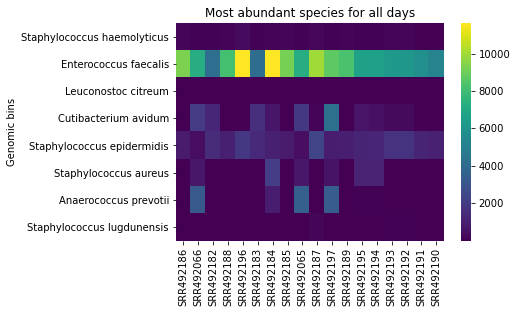

In [87]:
ax = plt.axes()
sns.heatmap(bin_df, ax = ax,cmap = 'viridis')
ax.set_title('Most abundant species for all days')
plt.show()

In [82]:
bins_select_df = bin_df[['SRR492183','SRR492186','SRR492188','SRR492189', 
                        'SRR492190','SRR492193','SRR492194','SRR492197']]
bins_select_df.rename(columns = {'SRR492183':'day1', 'SRR492186':'day2', 'SRR492188':'day3','SRR492189':'day4','SRR492190':'day5','SRR492193':'day6','SRR492194':'day7','SRR492197':'day8'}, inplace=True)

bins_select_df

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,day1,day2,day3,day4,day5,day6,day7,day8
Genomic bins,,,,,,,,
Staphylococcus haemolyticus,50.103235,167.273691,102.432386,97.521190,14.523105,172.449773,53.357374,72.544371
Enterococcus faecalis,4115.242526,9348.741359,8139.870719,8308.156703,5267.858711,6267.155205,6550.505763,8745.103316
Leuconostoc citreum,1.751119,8.887730,5.838109,5.929623,4.583909,1.804228,3.259988,19.275630
Cutibacterium avidum,1566.783656,0.552469,0.875860,0.356678,1.251430,315.740755,457.543378,4250.653466
Staphylococcus epidermidis,1335.147536,820.872805,1033.761424,999.273162,1071.641137,1670.022745,1187.660153,936.681889
Staphylococcus aureus,1.287979,1.452063,1.347894,0.747525,3.287205,6.459688,1124.427189,590.194971
Anaerococcus prevotii,0.186461,0.065351,4.223711,0.979570,0.259990,1.211367,73.851083,3366.910935
Staphylococcus lugdunensis,2.555610,6.194380,0.475050,0.333899,0.491073,78.291586,6.639770,10.595311


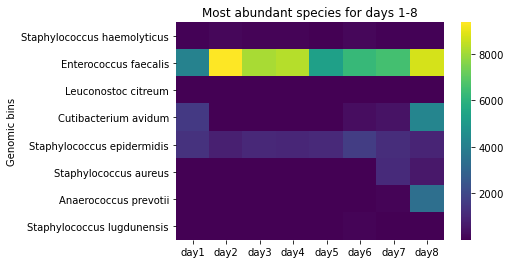

In [86]:
ax = plt.axes()
sns.heatmap(bins_select_df, ax = ax, cmap = 'viridis')
ax.set_title('Most abundant species for days 1-8')
plt.show()

### Question 5:
It looks like this plot matches our Krona plots. Staphylococcus epidermis is slightly enriched in day 1 in both the visual and the heatmap.
Enterococcus faecalis is highly present in all days and peaks at day 1 for both datasets. The abundances may be different.
Thanks Steph and Kate! You guys are rockstars <3